In [2]:
 
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename)) 

In [5]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import glob
import os
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt


In [6]:
tess_directory = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data"
rav_directory = "/kaggle/input/ravdess-emotional-speech-audio/"


In [7]:
# Run one example 
directory_list = os.listdir(tess_directory)
directory_list


['YAF_fear',
 'OAF_angry',
 'OAF_Fear',
 'OAF_disgust',
 'OAF_neutral',
 'YAF_angry',
 'OAF_Sad',
 'YAF_disgust',
 'YAF_neutral',
 'OAF_Pleasant_surprise',
 'YAF_happy',
 'OAF_happy',
 'YAF_sad',
 'YAF_pleasant_surprised']

In [9]:
# Run one example 
directory_list = os.listdir(rav_directory)
directory_list


['Actor_02',
 'Actor_17',
 'Actor_05',
 'Actor_16',
 'Actor_21',
 'Actor_01',
 'Actor_11',
 'Actor_20',
 'Actor_08',
 'Actor_15',
 'Actor_06',
 'Actor_12',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_04',
 'Actor_19',
 'Actor_10',
 'Actor_09',
 'audio_speech_actors_01-24',
 'Actor_14',
 'Actor_03',
 'Actor_13',
 'Actor_18',
 'Actor_07']

# RAVDESS DATASET


In [10]:
rav_directory_list = os.listdir(rav_directory)
rav_directory_list.sort()

In [11]:


emotions = []
genders = []
file_paths = []
for i in rav_directory_list:
    files = os.listdir(rav_directory + i)
    for file in files:
        try:

            parts = file.split('.')[0].split('-')
            emotions.append(int(parts[2]))
            temp = int(parts[6])
            if temp % 2 == 0:
                temp = "female"
            else:
                temp = "male"
            genders.append(temp)
            file_paths.append(rav_directory + i + '/' + file)
        except Exception as e:pass


In [12]:
rav_df = pd.DataFrame(emotions)
rav_df = rav_df.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad', 5: 'angry', 6: 'fear', 7: 'disgust', 8: 'surprise'})
rav_df = pd.concat([pd.DataFrame(genders), rav_df], axis=1)
rav_df.columns = ['gender', 'emotion']
rav_df['labels'] = rav_df.gender + '_' + rav_df.emotion
rav_df['source'] = 'RAVDESS'  
rav_df = pd.concat([rav_df, pd.DataFrame(file_paths, columns=['path'])], axis=1)
rav_df = rav_df.drop(['gender', 'emotion'], axis=1)
rav_df.head()


labels   source                                               path
0  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
1  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
2      male_sad  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
3  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
4  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...

In [13]:
rav_df.labels.value_counts()


labels
male_neutral       144
female_neutral     144
male_sad            96
male_fear           96
male_happy          96
male_disgust        96
male_angry          96
male_surprise       96
female_surprise     96
female_disgust      96
female_fear         96
female_sad          96
female_happy        96
female_angry        96
Name: count, dtype: int64

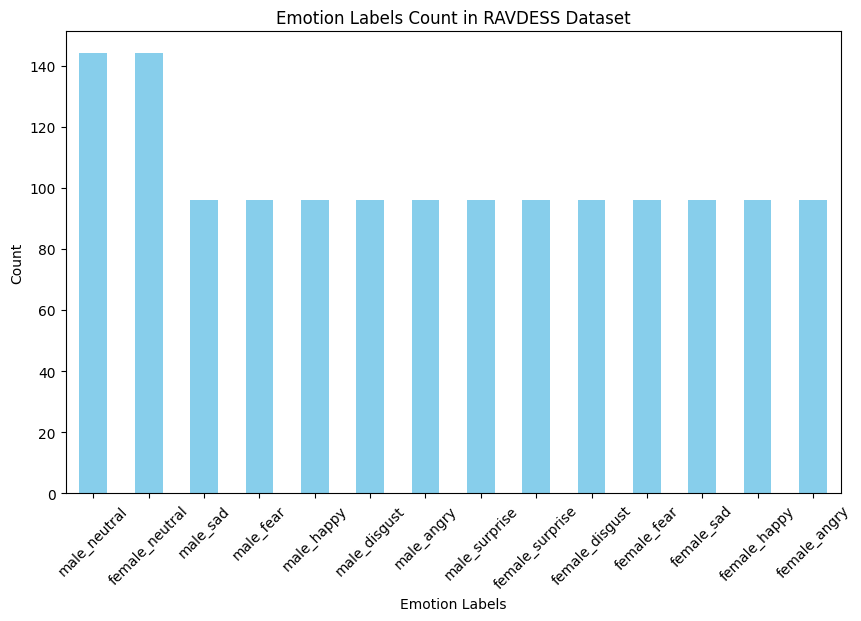

In [14]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.figure(figsize=(10, 6))
rav_df.labels.value_counts().plot(kind='bar', color='skyblue')
plt.title('Emotion Labels Count in RAVDESS Dataset')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

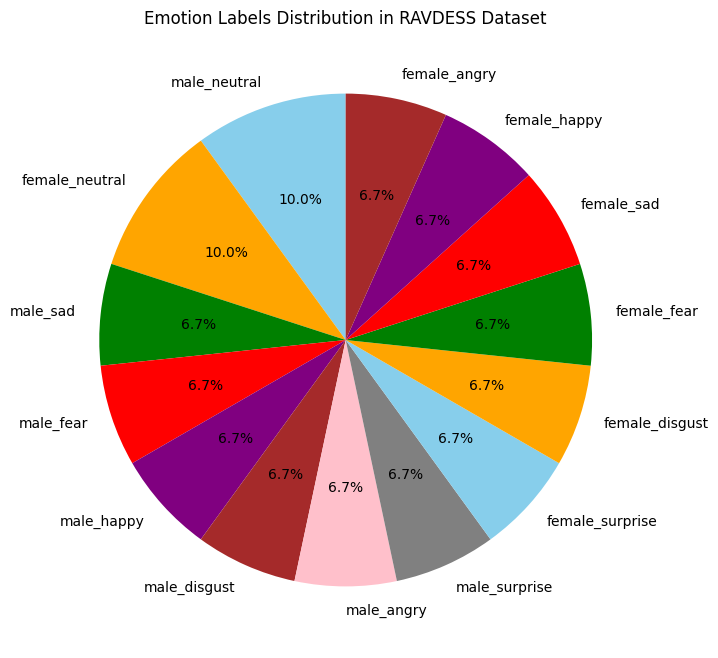

In [15]:
# Plotting pie chart
plt.figure(figsize=(8, 8))
rav_df.labels.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
plt.title('Emotion Labels Distribution in RAVDESS Dataset')
plt.ylabel('')
plt.show()

In [16]:
import IPython.display as ipd # to play audio in the notebook


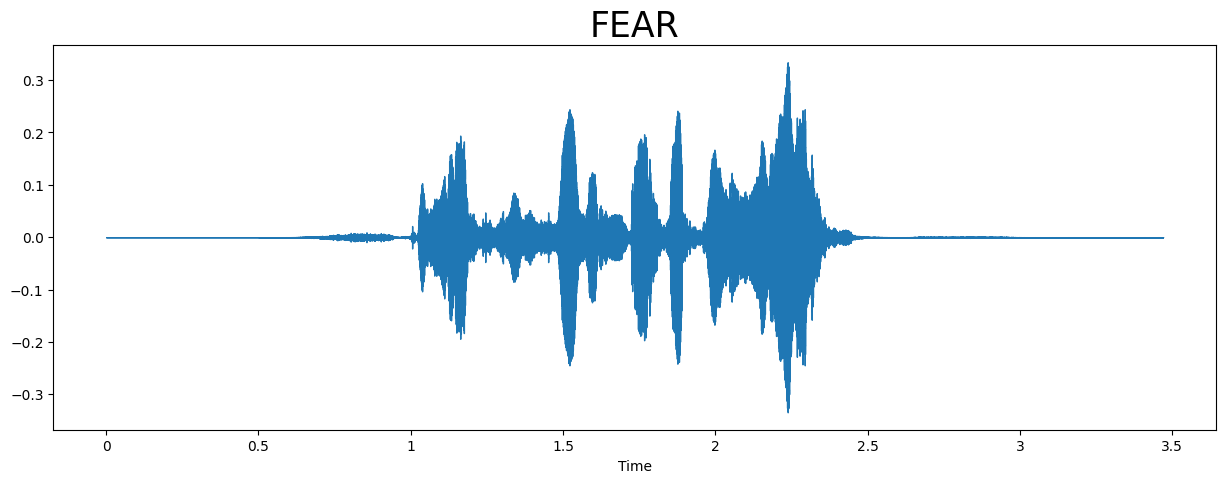

In [17]:
file_name = rav_directory + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sample_rate = librosa.load(file_name)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('FEAR', size=25)

# Audio
ipd.Audio(file_name)


In [18]:
import plotly.graph_objs as go
from plotly.offline import iplot

file_name = rav_directory + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sample_rate = librosa.load(file_name)

# Plot the 3D waveform
trace = go.Scatter3d(x=list(range(len(data))), y=data, z=[0] * len(data), mode='lines')
layout = go.Layout(title='3D Waveform for Audio File', scene=dict(xaxis_title='Sample Number', yaxis_title='Amplitude', zaxis_title=''),
                   width=800, height=600)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# Audio
ipd.Audio(file_name)


# TESS Dataset

In [19]:
# Run one example 
directory_list = os.listdir(tess_directory)
directory_list


['YAF_fear',
 'OAF_angry',
 'OAF_Fear',
 'OAF_disgust',
 'OAF_neutral',
 'YAF_angry',
 'OAF_Sad',
 'YAF_disgust',
 'YAF_neutral',
 'OAF_Pleasant_surprise',
 'YAF_happy',
 'OAF_happy',
 'YAF_sad',
 'YAF_pleasant_surprised']

In [20]:
data_paths = []
emotions = []

for folder_name in directory_list:
    file_names = os.listdir(tess_directory+"/" + folder_name)
    for file in file_names:
        if folder_name == 'OAF_angry' or folder_name == 'YAF_angry':
            emotions.append('female_angry')
        elif folder_name == 'OAF_disgust' or folder_name == 'YAF_disgust':
            emotions.append('female_disgust')
        elif folder_name == 'OAF_Fear' or folder_name == 'YAF_fear':
            emotions.append('female_fear')
        elif folder_name == 'OAF_happy' or folder_name == 'YAF_happy':
            emotions.append('female_happy')
        elif folder_name == 'OAF_neutral' or folder_name == 'YAF_neutral':
            emotions.append('female_neutral')                                
        elif folder_name == 'OAF_Pleasant_surprise' or folder_name == 'YAF_pleasant_surprised':
            emotions.append('female_surprise')               
        elif folder_name == 'OAF_Sad' or folder_name == 'YAF_sad':
            emotions.append('female_sad')
        else:
            emotions.append('Unknown')
        data_paths.append(tess_directory + folder_name + "/" + file)

TESS_dataframe = pd.DataFrame(emotions, columns=['labels'])
TESS_dataframe['source'] = 'TESS'
TESS_dataframe = pd.concat([TESS_dataframe, pd.DataFrame(data_paths, columns=['path'])], axis=1)
TESS_dataframe.head()


labels source                                               path
0  female_fear   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
1  female_fear   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
2  female_fear   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
3  female_fear   TESS  /kaggle/input/toronto-emotional-speech-set-tes...
4  female_fear   TESS  /kaggle/input/toronto-emotional-speech-set-tes...

In [21]:
TESS_dataframe.labels.value_counts()


labels
female_fear        400
female_angry       400
female_disgust     400
female_neutral     400
female_sad         400
female_surprise    400
female_happy       400
Name: count, dtype: int64

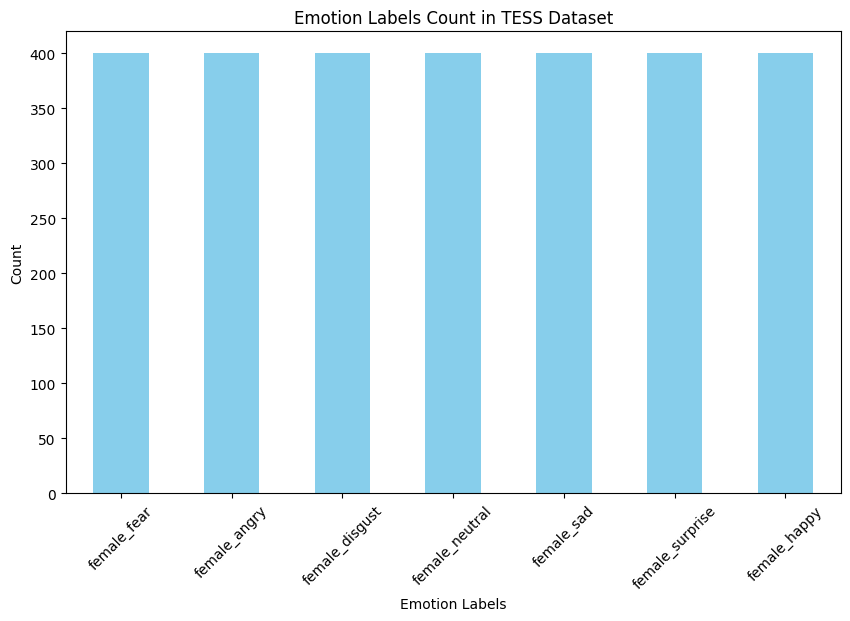

In [22]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.figure(figsize=(10, 6))
TESS_dataframe.labels.value_counts().plot(kind='bar', color='skyblue')
plt.title('Emotion Labels Count in TESS Dataset')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

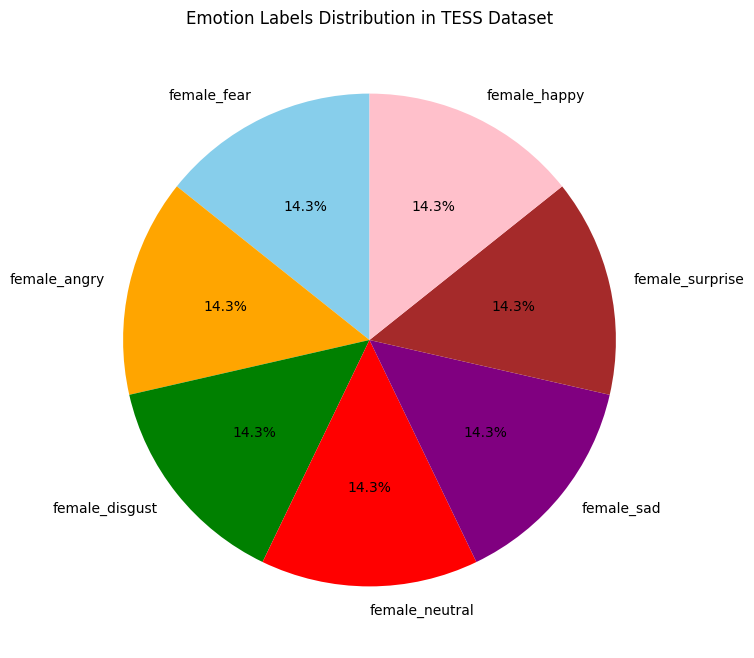

In [23]:
# Plotting pie chart
plt.figure(figsize=(8, 8))
TESS_dataframe.labels.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
plt.title('Emotion Labels Distribution in TESS Dataset')
plt.ylabel('')
plt.show()

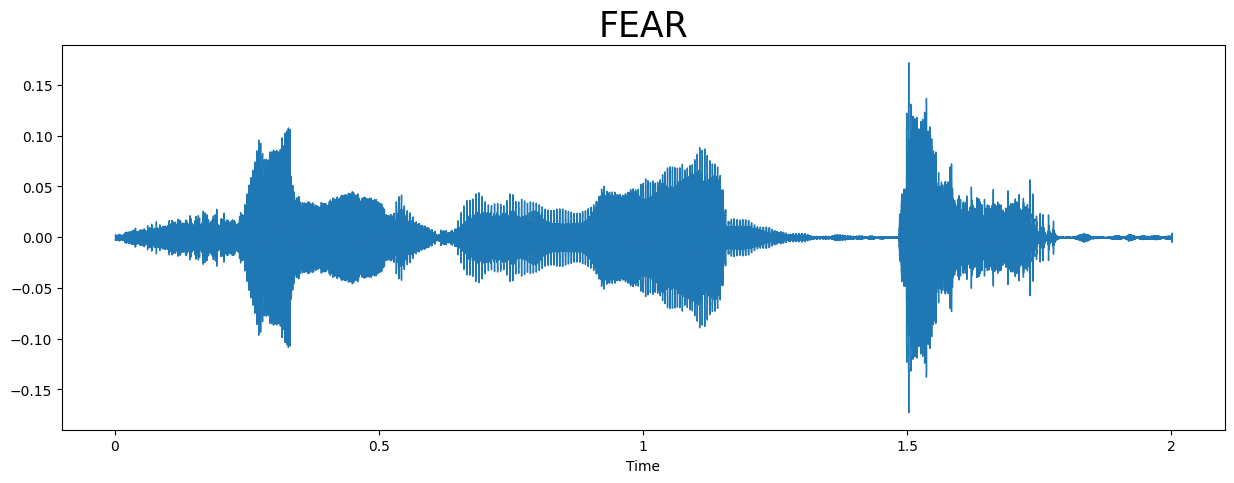

In [24]:
file_name = "/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav"
data, sample_rate = librosa.load(file_name)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sample_rate)
plt.title('FEAR', size=25)

# Audio
ipd.Audio(file_name)


In [25]:
import plotly.graph_objs as go
from plotly.offline import iplot

data, sample_rate = librosa.load(file_name)

# Plot the 3D waveform
trace = go.Scatter3d(x=list(range(len(data))), y=data, z=[0] * len(data), mode='lines')
layout = go.Layout(title='3D Waveform for Audio File', scene=dict(xaxis_title='Sample Number', yaxis_title='Amplitude', zaxis_title=''),
                   width=800, height=600)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

# Audio
ipd.Audio(file_name)


# Combining Both the Dataset

In [26]:
TESS_dataframe

labels source  \
0         female_fear   TESS   
1         female_fear   TESS   
2         female_fear   TESS   
3         female_fear   TESS   
4         female_fear   TESS   
...               ...    ...   
2795  female_surprise   TESS   
2796  female_surprise   TESS   
2797  female_surprise   TESS   
2798  female_surprise   TESS   
2799  female_surprise   TESS   

                                                   path  
0     /kaggle/input/toronto-emotional-speech-set-tes...  
1     /kaggle/input/toronto-emotional-speech-set-tes...  
2     /kaggle/input/toronto-emotional-speech-set-tes...  
3     /kaggle/input/toronto-emotional-speech-set-tes...  
4     /kaggle/input/toronto-emotional-speech-set-tes...  
...                                                 ...  
2795  /kaggle/input/toronto-emotional-speech-set-tes...  
2796  /kaggle/input/toronto-emotional-speech-set-tes...  
2797  /kaggle/input/toronto-emotional-speech-set-tes...  
2798  /kaggle/input/toronto-emotional-speech-set-tes...  
2799  /kaggle/input/toronto-emotional-speech-set-tes...  

[2800 rows x 3 columns]

In [27]:
rav_df


labels   source  \
0        male_neutral  RAVDESS   
1        male_neutral  RAVDESS   
2            male_sad  RAVDESS   
3        male_neutral  RAVDESS   
4        male_neutral  RAVDESS   
...               ...      ...   
1435     female_happy  RAVDESS   
1436     female_happy  RAVDESS   
1437   female_neutral  RAVDESS   
1438  female_surprise  RAVDESS   
1439     female_happy  RAVDESS   

                                                   path  
0     /kaggle/input/ravdess-emotional-speech-audio/A...  
1     /kaggle/input/ravdess-emotional-speech-audio/A...  
2     /kaggle/input/ravdess-emotional-speech-audio/A...  
3     /kaggle/input/ravdess-emotional-speech-audio/A...  
4     /kaggle/input/ravdess-emotional-speech-audio/A...  
...                                                 ...  
1435  /kaggle/input/ravdess-emotional-speech-audio/A...  
1436  /kaggle/input/ravdess-emotional-speech-audio/A...  
1437  /kaggle/input/ravdess-emotional-speech-audio/A...  
1438  /kaggle/input/ravdess-emotional-speech-audio/A...  
1439  /kaggle/input/ravdess-emotional-speech-audio/A...  

[1440 rows x 3 columns]

In [28]:

# Concatenating dataframes
combined_df = pd.concat([rav_df, TESS_dataframe])

# Print the combined dataframe
combined_df

labels   source  \
0        male_neutral  RAVDESS   
1        male_neutral  RAVDESS   
2            male_sad  RAVDESS   
3        male_neutral  RAVDESS   
4        male_neutral  RAVDESS   
...               ...      ...   
2795  female_surprise     TESS   
2796  female_surprise     TESS   
2797  female_surprise     TESS   
2798  female_surprise     TESS   
2799  female_surprise     TESS   

                                                   path  
0     /kaggle/input/ravdess-emotional-speech-audio/A...  
1     /kaggle/input/ravdess-emotional-speech-audio/A...  
2     /kaggle/input/ravdess-emotional-speech-audio/A...  
3     /kaggle/input/ravdess-emotional-speech-audio/A...  
4     /kaggle/input/ravdess-emotional-speech-audio/A...  
...                                                 ...  
2795  /kaggle/input/toronto-emotional-speech-set-tes...  
2796  /kaggle/input/toronto-emotional-speech-set-tes...  
2797  /kaggle/input/toronto-emotional-speech-set-tes...  
2798  /kaggle/input/toronto-emotional-speech-set-tes...  
2799  /kaggle/input/toronto-emotional-speech-set-tes...  

[4240 rows x 3 columns]

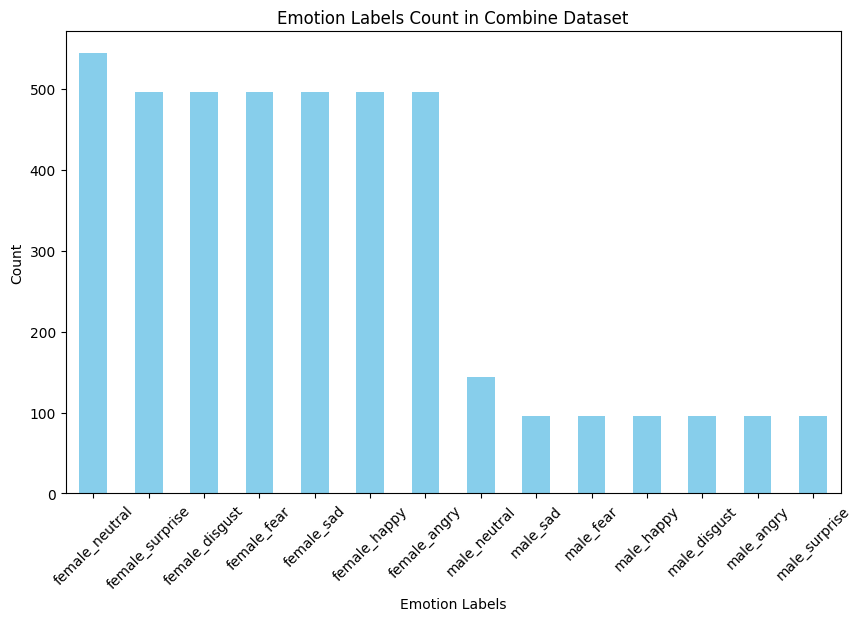

In [29]:
 
# Plotting histogram
plt.figure(figsize=(10, 6))
combined_df.labels.value_counts().plot(kind='bar', color='skyblue')
plt.title('Emotion Labels Count in Combine Dataset')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

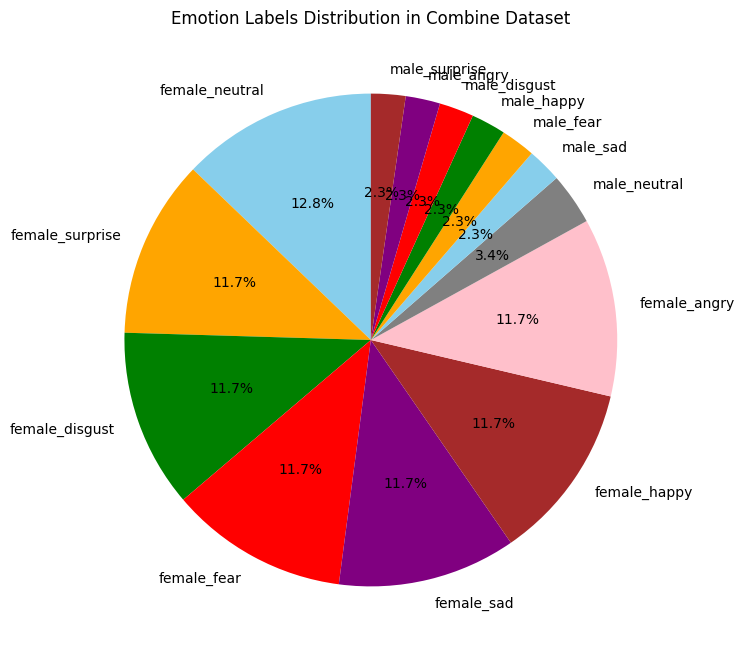

In [30]:
# Plotting pie chart
plt.figure(figsize=(8, 8))
combined_df.labels.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
plt.title('Emotion Labels Distribution in Combine Dataset')
plt.ylabel('')
plt.show()

# Preprocessing AUDIO File

In [31]:
firstfilepath = r"/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/OAF_happy/OAF_beg_happy.wav"


In [32]:

x, sr = librosa.load(firstfilepath)
print(type(x), type(sr))
print('Sample Rate : ',sr)

<class 'numpy.ndarray'> <class 'int'>
Sample Rate :  22050


In [33]:
# Playing audio
ipd.Audio(firstfilepath)

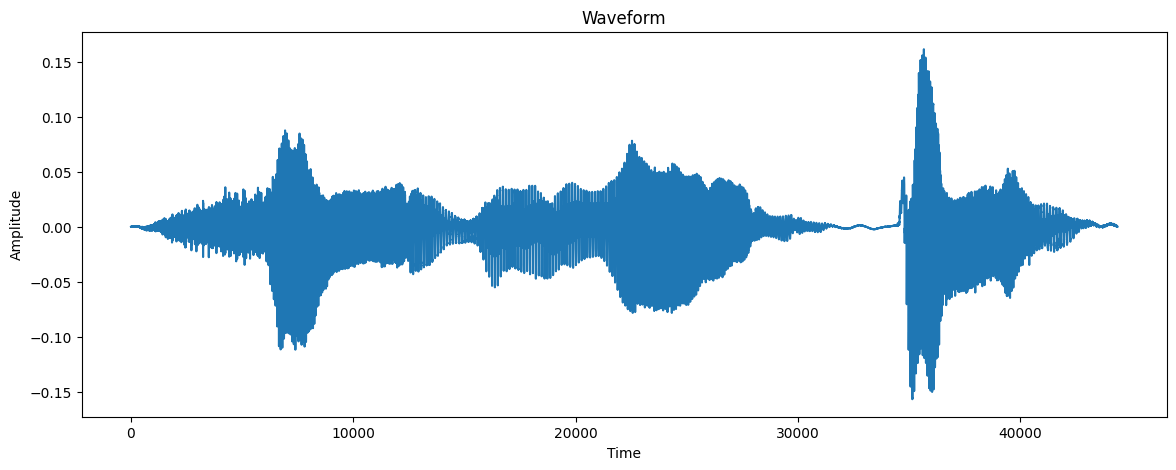

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(x)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


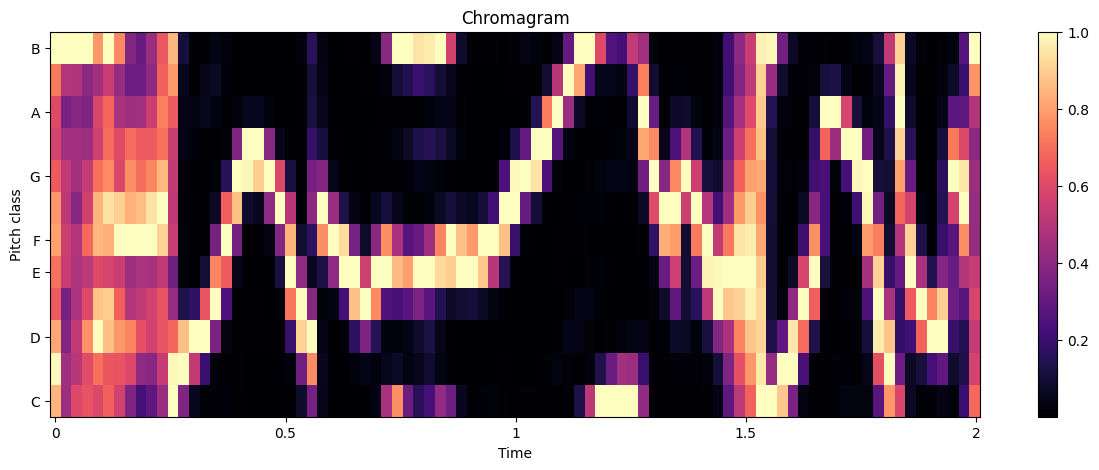

In [35]:
chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()


# RMSE
The RMSE (root mean squared energy) of the signal, defined as
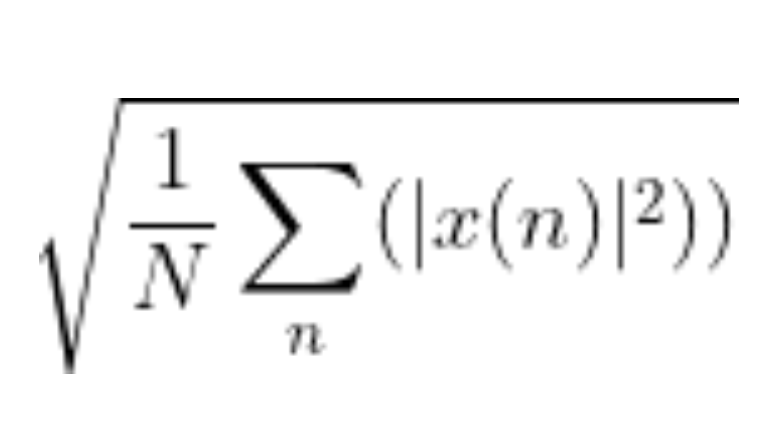! 

In [36]:
example_rmse = librosa.feature.rms(y=x)
print(example_rmse.shape)
print(np.mean(example_rmse))


(1, 87)
0.01954702


# The center of mass of the signal, e.g. the weighted mean of frequencies in the signal.


In [37]:
import sklearn


(87,)


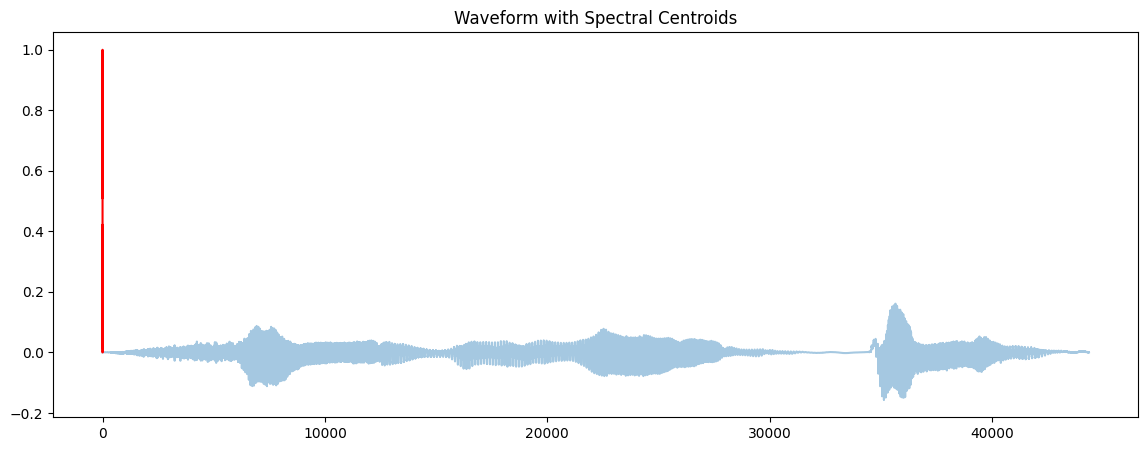

2132.5052067865863


In [38]:
import sklearn.preprocessing
import matplotlib.pyplot as plt

example_spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
print(example_spectral_centroids.shape)
frames = range(len(example_spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(14, 5))
plt.plot(x, alpha=0.4)
plt.plot(t, normalize(example_spectral_centroids), color='r')
plt.title('Waveform with Spectral Centroids')
plt.show()
print(np.mean(example_spectral_centroids))


# The Mel-Frequency Cepstral Coefficients (MFCCs) are a set of features which describe the shape of a spectral envelope.


(20, 87)
-19.136242


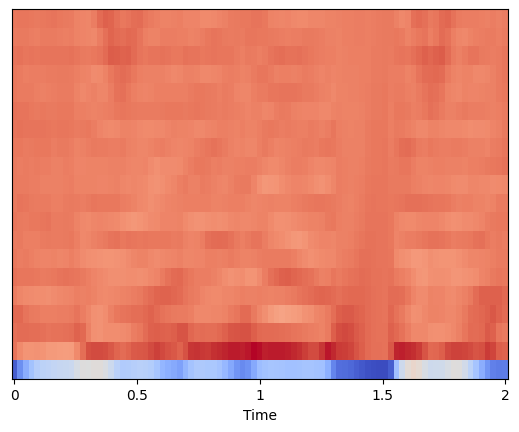

In [39]:
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
print(np.mean(mfccs))


# The zero crossing rate is the rate at which the signal changes sign (crosses y = 0).

5


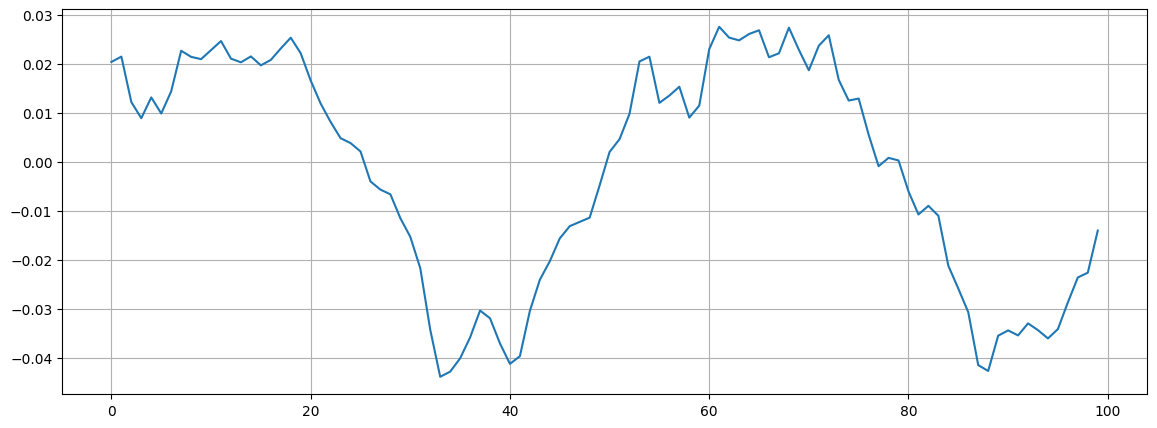

In [40]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

# Spectograms

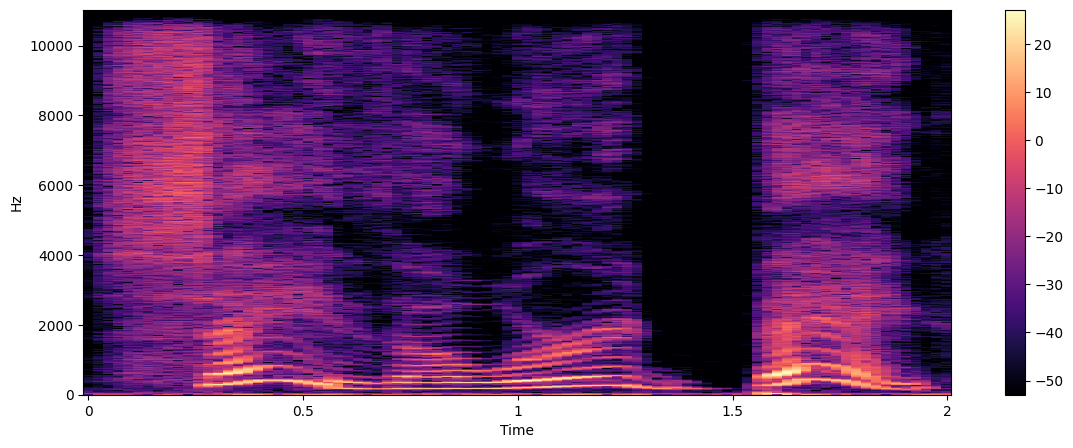

In [41]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [42]:
combined_df.head()

labels   source                                               path
0  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
1  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
2      male_sad  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
3  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...
4  male_neutral  RAVDESS  /kaggle/input/ravdess-emotional-speech-audio/A...

# Saving Important Features of audio files in a Separate Dataframe


Features: Chroma features, RMSE, Spectral Centroid, Spectral Bandwidth, Spectral Rolloff, Zero Crossing Rate, MFCCs

In [43]:
header = 'chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [44]:
header

['chroma_stft',
 'rms',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [45]:
# !rm /kaggle/working/dataset.csv

In [46]:
import csv
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [47]:
combined_df.columns

Index(['labels', 'source', 'path'], dtype='object')

In [48]:
combined_df.labels.unique()

array(['male_neutral', 'male_sad', 'male_fear', 'male_happy',
       'male_disgust', 'male_angry', 'male_surprise', 'female_surprise',
       'female_neutral', 'female_disgust', 'female_fear', 'female_sad',
       'female_happy', 'female_angry'], dtype=object)

In [ ]:
import pandas as pd

# Store the values in variables
for index, row in combined_df.iterrows():
    label = row['labels']
    audio_path = row['path']
#     print('Processing : ',audio_path)
    y, sr = librosa.load(audio_path, mono=True, duration=30)
    rms = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f' {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} '    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {label}'
    file = open('dataset.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())


In [50]:
data = pd.read_csv('dataset.csv')
data.head()

chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.562681  0.002670        3093.278772         2561.449643  5886.747070   
1     0.578001  0.002419        3264.835340         2675.836113  6237.152100   
2     0.540006  0.004809        3370.305764         2620.182991  6317.572632   
3     0.513756  0.002096        3113.155410         2478.729058  5556.808706   
4     0.567082  0.002621        3240.736018         2520.161814  5997.995298   

   zero_crossing_rate       mfcc1      mfcc2     mfcc3      mfcc4  ...  \
0            0.394251 -698.637695  68.698586  1.100368  13.685941  ...   
1            0.380551 -692.855774  55.363899 -1.548319  16.038305  ...   
2            0.317941 -627.470520  50.890549 -4.893385  10.507071  ...   
3            0.337531 -704.541382  68.829437  4.728954  11.950599  ...   
4            0.365393 -697.166138  65.108208  0.930369  13.633627  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -1.705865  1.593434 -3.599213  0.606244  1.179877 -5.454558 -1.862115   
1 -2.641279  1.017250 -3.271536 -0.125076  0.415496 -4.512702 -0.981161   
2 -6.959074  0.331161 -4.906192 -5.106900  1.219879 -9.079950 -3.438987   
3  1.222750  0.595495 -4.025671  1.728974 -0.849788 -4.325156 -1.979643   
4 -1.627646  1.426725 -4.512682  1.485634  0.120333 -6.286184 -2.644152   

     mfcc19    mfcc20         label  
0 -0.450471 -1.033708  male_neutral  
1 -1.937504  0.539680  male_neutral  
2 -0.715181 -2.680291      male_sad  
3 -1.625535 -0.387032  male_neutral  
4 -0.073655 -1.724621  male_neutral  

[5 rows x 27 columns]

In [ ]:
# data['label'] = data['label'].str.replace('female_', '')
# data['label'] = data['label'].str.replace('male_', '')


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         1440 non-null   float64
 1   rms                 1440 non-null   float64
 2   spectral_centroid   1440 non-null   float64
 3   spectral_bandwidth  1440 non-null   float64
 4   rolloff             1440 non-null   float64
 5   zero_crossing_rate  1440 non-null   float64
 6   mfcc1               1440 non-null   float64
 7   mfcc2               1440 non-null   float64
 8   mfcc3               1440 non-null   float64
 9   mfcc4               1440 non-null   float64
 10  mfcc5               1440 non-null   float64
 11  mfcc6               1440 non-null   float64
 12  mfcc7               1440 non-null   float64
 13  mfcc8               1440 non-null   float64
 14  mfcc9               1440 non-null   float64
 15  mfcc10              1440 non-null   float64
 16  mfcc11

In [52]:
data.head()

chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.562681  0.002670        3093.278772         2561.449643  5886.747070   
1     0.578001  0.002419        3264.835340         2675.836113  6237.152100   
2     0.540006  0.004809        3370.305764         2620.182991  6317.572632   
3     0.513756  0.002096        3113.155410         2478.729058  5556.808706   
4     0.567082  0.002621        3240.736018         2520.161814  5997.995298   

   zero_crossing_rate       mfcc1      mfcc2     mfcc3      mfcc4  ...  \
0            0.394251 -698.637695  68.698586  1.100368  13.685941  ...   
1            0.380551 -692.855774  55.363899 -1.548319  16.038305  ...   
2            0.317941 -627.470520  50.890549 -4.893385  10.507071  ...   
3            0.337531 -704.541382  68.829437  4.728954  11.950599  ...   
4            0.365393 -697.166138  65.108208  0.930369  13.633627  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -1.705865  1.593434 -3.599213  0.606244  1.179877 -5.454558 -1.862115   
1 -2.641279  1.017250 -3.271536 -0.125076  0.415496 -4.512702 -0.981161   
2 -6.959074  0.331161 -4.906192 -5.106900  1.219879 -9.079950 -3.438987   
3  1.222750  0.595495 -4.025671  1.728974 -0.849788 -4.325156 -1.979643   
4 -1.627646  1.426725 -4.512682  1.485634  0.120333 -6.286184 -2.644152   

     mfcc19    mfcc20         label  
0 -0.450471 -1.033708  male_neutral  
1 -1.937504  0.539680  male_neutral  
2 -0.715181 -2.680291      male_sad  
3 -1.625535 -0.387032  male_neutral  
4 -0.073655 -1.724621  male_neutral  

[5 rows x 27 columns]

In [53]:
outputs = ['male_neutral', 'male_sad', 'male_fear', 'male_happy',
       'male_disgust', 'male_angry', 'male_surprise', 'female_surprise',
       'female_neutral', 'female_disgust', 'female_fear', 'female_sad',
       'female_happy', 'female_angry']

# outputs = ['neutral', 'sad', 'fear', 'happy',
#        'disgust', 'angry', 'surprise']


In [54]:


d = dict(zip(outputs, range(0,len(outputs))))

def return_key(val):
    for key, value in d.items():
        if value==val:
            return key
    return('Key Not Found')

In [55]:
# Converting labels into numbers
data['label'] = data['label'].map(d)
data.head()

chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.562681  0.002670        3093.278772         2561.449643  5886.747070   
1     0.578001  0.002419        3264.835340         2675.836113  6237.152100   
2     0.540006  0.004809        3370.305764         2620.182991  6317.572632   
3     0.513756  0.002096        3113.155410         2478.729058  5556.808706   
4     0.567082  0.002621        3240.736018         2520.161814  5997.995298   

   zero_crossing_rate       mfcc1      mfcc2     mfcc3      mfcc4  ...  \
0            0.394251 -698.637695  68.698586  1.100368  13.685941  ...   
1            0.380551 -692.855774  55.363899 -1.548319  16.038305  ...   
2            0.317941 -627.470520  50.890549 -4.893385  10.507071  ...   
3            0.337531 -704.541382  68.829437  4.728954  11.950599  ...   
4            0.365393 -697.166138  65.108208  0.930369  13.633627  ...   

     mfcc12    mfcc13    mfcc14    mfcc15    mfcc16    mfcc17    mfcc18  \
0 -1.705865  1.593434 -3.599213  0.606244  1.179877 -5.454558 -1.862115   
1 -2.641279  1.017250 -3.271536 -0.125076  0.415496 -4.512702 -0.981161   
2 -6.959074  0.331161 -4.906192 -5.106900  1.219879 -9.079950 -3.438987   
3  1.222750  0.595495 -4.025671  1.728974 -0.849788 -4.325156 -1.979643   
4 -1.627646  1.426725 -4.512682  1.485634  0.120333 -6.286184 -2.644152   

     mfcc19    mfcc20  label  
0 -0.450471 -1.033708      0  
1 -1.937504  0.539680      0  
2 -0.715181 -2.680291      1  
3 -1.625535 -0.387032      0  
4 -0.073655 -1.724621      0  

[5 rows x 27 columns]

In [56]:
import os
import keras
from keras.layers import *
from keras import metrics
from keras.utils import to_categorical

import sklearn
from sklearn.model_selection import train_test_split

In [57]:
# Separate the label from the data
labels = data['label']
features = data.drop('label', axis=1)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

# Convert the labels to categorical form
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Print the transformed labels
print("Transformed Training Labels:")
print(y_train_categorical)
print("\nTransformed Testing Labels:")
print(y_test_categorical)


Transformed Training Labels:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]

Transformed Testing Labels:
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Separate features and labels
RF_X = data.drop('label', axis=1)
RF_y = data['label']

# Split the data into training and testing sets
RF_X_Train, RF_X_Test, RF_y_Train, RF_y_Test = train_test_split(RF_X, RF_y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(RF_X_Train, RF_y_Train)

# Feature importance analysis
feature_importances = rf_classifier.feature_importances_
feature_names = RF_X.columns

# Print the importance of each feature
for name, importance in zip(feature_names, feature_importances):
    print(f"Feature: {name}, Importance: {importance}")

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
RF_y_pred = rf_classifier.predict(RF_X_Test)

# Calculate the accuracy
RF_accuracy = accuracy_score(RF_y_Test, RF_y_pred)
print(f"Accuracy: {RF_accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(RF_y_Test, RF_y_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(RF_y_Test, RF_y_pred))


Feature: chroma_stft, Importance: 0.03600569465145962
Feature: rms, Importance: 0.059137617251678154
Feature: spectral_centroid, Importance: 0.025855531788438763
Feature: spectral_bandwidth, Importance: 0.029778952877309844
Feature: rolloff, Importance: 0.025571262012957546
Feature: zero_crossing_rate, Importance: 0.02848713251293691
Feature: mfcc1, Importance: 0.06294076157400769
Feature: mfcc2, Importance: 0.0500578593314581
Feature: mfcc3, Importance: 0.043302708223275026
Feature: mfcc4, Importance: 0.03618419955869398
Feature: mfcc5, Importance: 0.05971645226846554
Feature: mfcc6, Importance: 0.04201690810807482
Feature: mfcc7, Importance: 0.032920834620630966
Feature: mfcc8, Importance: 0.045146231968636756
Feature: mfcc9, Importance: 0.03254057142642852
Feature: mfcc10, Importance: 0.033931444202232534
Feature: mfcc11, Importance: 0.054903436212601325
Feature: mfcc12, Importance: 0.031851884893
Feature: mfcc13, Importance: 0.031030231986323226
Feature: mfcc14, Importance: 0.02991

In [59]:
from sklearn.feature_selection import SelectFromModel

# Feature importance analysis
feature_importances = rf_classifier.feature_importances_
important_features = sorted(zip(feature_importances, feature_names), reverse=True)[:12]  # Get the top 10 important features
important_feature_names = [f[1] for f in important_features]

# Retrain the Random Forest model with important features only
RF_X_Important = RF_X[important_feature_names]
RF_X_Train_Important, RF_X_Test_Important, _, _ = train_test_split(RF_X_Important, RF_y, test_size=0.2, random_state=42)

# Train the Random Forest classifier with important features
rf_classifier_important = RandomForestClassifier(random_state=42)
rf_classifier_important.fit(RF_X_Train_Important, RF_y_Train)

# Make predictions on the test set using the model with important features
RF_y_pred_important = rf_classifier_important.predict(RF_X_Test_Important)

# Calculate the accuracy of the model with important features
RF_accuracy_important = accuracy_score(RF_y_Test, RF_y_pred_important)
print(f"Accuracy with Important Features: {RF_accuracy_important}")

# Print the classification report for the model with important features
print("Classification Report with Important Features:")
print(classification_report(RF_y_Test, RF_y_pred_important))

# Print the confusion matrix for the model with important features
print("Confusion Matrix with Important Features:")
print(confusion_matrix(RF_y_Test, RF_y_pred_important))


Accuracy with Important Features: 0.5833333333333334
Classification Report with Important Features:
              precision    recall  f1-score   support

           0       0.64      0.75      0.69        28
           1       0.31      0.42      0.36        12
           2       0.43      0.33      0.38        18
           3       0.61      0.46      0.52        24
           4       0.41      0.41      0.41        17
           5       0.81      0.74      0.77        23
           6       0.47      0.50      0.49        18
           7       0.48      0.81      0.60        16
           8       0.76      0.84      0.80        31
           9       0.53      0.38      0.44        26
          10       0.60      0.43      0.50        21
          11       0.47      0.40      0.43        20
          12       0.63      0.71      0.67        17
          13       0.74      0.82      0.78        17

    accuracy                           0.58       288
   macro avg       0.56      0.57 

In [60]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

# Define the sequential model
audio_model = Sequential()

# Adding LSTM layers for audio analysis
audio_model.add(LSTM(128, input_shape=(26, 1), return_sequences=True))
audio_model.add(Dropout(0.2))
audio_model.add(LSTM(64))
audio_model.add(Dropout(0.2))

# Adding Dense layers with BatchNormalization and Dropout
audio_model.add(Dense(256, activation='relu'))
audio_model.add(BatchNormalization())
audio_model.add(Dropout(0.4))
audio_model.add(Dense(128, activation='relu'))
audio_model.add(BatchNormalization())
audio_model.add(Dropout(0.4))

# Final output layer
audio_model.add(Dense(len(outputs), activation='softmax'))

# Compiling the model with a lower learning rate
opt = Adam(learning_rate=0.0001)
audio_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
audio_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 26, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 26, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                        

In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(filepath='best_model.h5',
                                  monitor='val_accuracy',
                                  save_best_only=True,
                                  mode='max',
                                  verbose=1)

# Train the model with the ModelCheckpoint callback
training_history = audio_model.fit(X_train, y_train_categorical,
                                batch_size=170,
                                epochs=2000,
                                shuffle=True,
                                validation_data=(X_test, y_test_categorical),
                                callbacks=[model_checkpoint],
                                verbose=1)

Epoch 1766/2000
8/8 [==============================] - ETA: 0s - loss: 0.0657 - accuracy: 0.9784
Epoch 1766: val_accuracy did not improve from 0.99923
8/8 [==============================] - 0s 16ms/step - loss: 0.0657 - accuracy: 0.9784 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 1767/2000
8/8 [==============================] - ETA: 0s - loss: 0.0629 - accuracy: 0.9776
Epoch 1767: val_accuracy did not improve from 0.99923
8/8 [==============================] - 0s 16ms/step - loss: 0.0629 - accuracy: 0.9776 - val_loss: 0.0034 - val_accuracy: 0.9992
Epoch 1768/2000
8/8 [==============================] - ETA: 0s - loss: 0.0689 - accuracy: 0.9769
Epoch 1768: val_accuracy did not improve from 0.99923
8/8 [==============================] - 0s 16ms/step - loss: 0.0689 - accuracy: 0.9769 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 1769/2000
8/8 [==============================] - ETA: 0s - loss: 0.0563 - accuracy: 0.9807
Epoch 1769: val_accuracy did not improve from 0.99923
8/8 [=======

In [68]:
loss = audio_model.evaluate(X_test, y_test_categorical, verbose=1)


5/5 [==============================] - 0s 5ms/step - loss: 2.9292 - accuracy: 0.8511


In [76]:
print("[INFO] Calculating model accuracy")
scores = audio_model.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {scores[1]*100}")


[INFO] Calculating model accuracy
5/5 [==============================] - 0s 5ms/step - loss: 1.2292 - accuracy: 0.0.8511
Test Accuracy: 85.11


In [77]:
from keras.models import model_from_json
# Dump pickle file of the model
print("[INFO] Saving model...")
# serialize model to JSON
model_json = audio_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
audio_model.save_weights("model.h5")
print("Saved model to disk")

[INFO] Saving model...
Saved model to disk


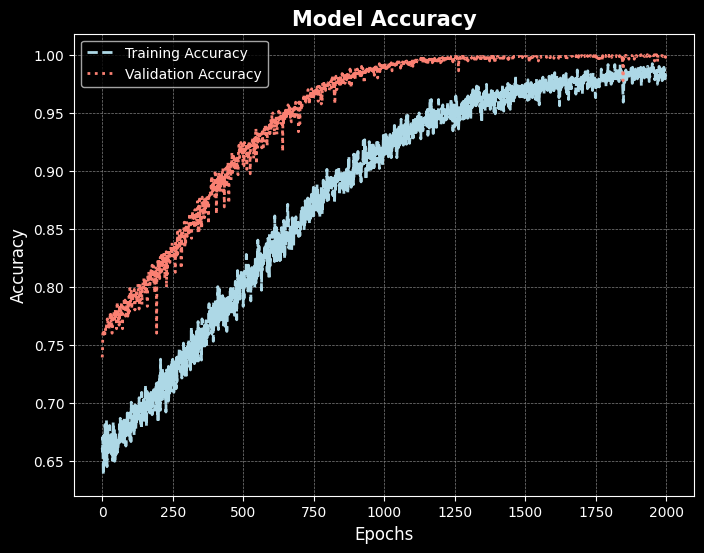

In [78]:
# Setting the plot style
plt.style.use('dark_background')

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot(training_history.history['accuracy'], label='Training Accuracy', color='lightblue', linestyle='dashed', linewidth=2)
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy', color='salmon', linestyle='dotted', linewidth=2)
plt.title('Model Accuracy', fontsize=15, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()

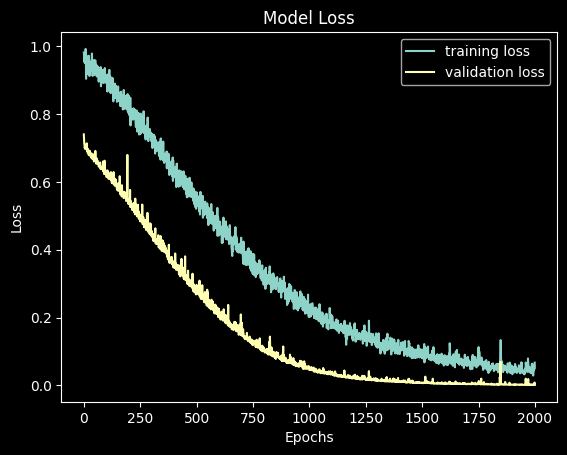

In [79]:
# Plotting the loss
plt.figure(1)
plt.plot(training_history.history['loss'], label='training loss')  # Changed 'history' to 'training_history'
plt.plot(training_history.history['val_loss'], label='validation loss')  # Changed 'history' to 'training_history'
plt.title('Model Loss')  # Modified the title
plt.xlabel('Epochs')  # Modified the x-label
plt.ylabel('Loss')  # Modified the y-label
plt.legend()
plt.show()

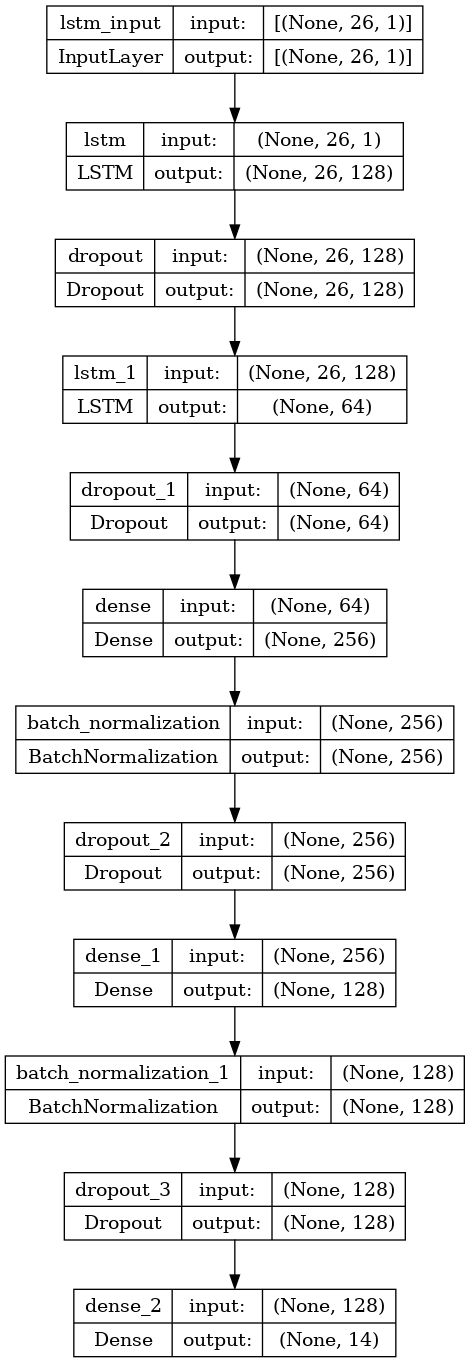

In [80]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture as a PNG image
plot_model(audio_model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [81]:
def process_audio(taalfile):
    print('Processing ',taalfile)
    y, sr = librosa.load(taalfile, mono=True, duration=30)
    rms = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f' {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} '    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
    to_append += f' {t}'
    print(to_append.split())
    
    file = open('dataset.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [105]:
header = 'chroma_stft rms spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

def process_audio(taalfile):
    
    print('Processing ',taalfile)
    y, sr = librosa.load(taalfile, mono=True, duration=30)
    rms = librosa.feature.rms(y=y)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    to_append = f' {np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} '    
    for e in mfcc:
        to_append += f' {np.mean(e)}'
        
    return to_append

live_data = process_audio(r"/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_base_disgust.wav")

Processing  /kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_disgust/YAF_base_disgust.wav


In [106]:
live_data_list = []
for i in live_data.split():
    live_data_list.append(float(i))

In [107]:
rs = audio_model.predict([live_data_list])


1/1 [==============================] - 0s 36ms/step


In [108]:
outputs = ['male_neutral', 'male_sad', 'male_fear', 'male_happy', 'male_disgust', 'male_angry', 'male_surprise', 'female_surprise', 'female_neutral', 'female_disgust', 'female_fear', 'female_sad', 'female_happy', 'female_angry']

d = dict(zip(outputs, range(0, len(outputs))))

def return_key(val):
    for key, value in d.items():
        if value == val:
            return key
    return 'Key Not Found'



In [111]:
result = audio_model.predict([live_data_list])

result

1/1 [==============================] - 0s 35ms/step


array([[6.2457019e-07, 2.9675798e-06, 1.0084614e-06, 4.3354201e-04,
        1.6756151e-02, 9.8262823e-01, 2.5187398e-06, 1.4794527e-06,
        9.1275224e-06, 5.4002891e-09, 1.9567031e-08, 2.8817364e-09,
        2.0801641e-08, 1.6435943e-04]], dtype=float32)